In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from scipy.stats import kendalltau,pearsonr,spearmanr


Number of molecules: 343


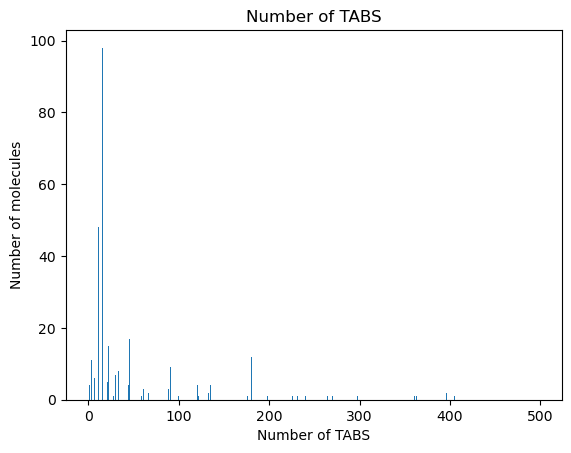

In [2]:
df_tabs_sr = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/CarlsSetnTABS_sr.txt', sep=' ', header=None)
df_tabs_sr.columns = ['smiles', 'nTABS']
print('Number of molecules:', len(df_tabs_sr))
plt.hist(df_tabs_sr['nTABS'], bins=range(0, 500, 1))
plt.title('Number of TABS')
plt.xlabel('Number of TABS')
plt.ylabel('Number of molecules')
plt.show()


In [3]:
with open('confs_generated.pkl', 'rb') as f:
    data = pickle.load(f)
smiles = data['smiles']
confs_generated = data['confs_generated']
df_confs = pd.DataFrame({'smiles': smiles, 'confs_generated': confs_generated})
print('Number of molecules:', len(df_confs))


Number of molecules: 3018


In [4]:
#combine based on smiles
combined = pd.merge(df_tabs_sr, df_confs, on='smiles')
print(len(combined))
combined

342


,smiles,nTABS,confs_generated
0,O=C1c2ccccc2C(=O)c2c(O)cccc21,15,1
1,c1ccc2c(c1)CCc1ccccc1-2,15,2
2,ClC1=C(Cl)[C@]2(Cl)[C@@H]3[C@@H]([C@@H](Cl)O[C...,11,9
3,O=S1(=O)OC[C@@H]2[C@H](CO1)[C@]1(Cl)C(Cl)=C(Cl...,29,47
4,C1=CCC=C1,3,1
...,...,...,...
337,C[C@H]1CC[C@H](C)CC1,15,20
338,C[C@@H]1CCC[C@@H]1C,11,11
339,C=C(C)[C@H]1CC=C(C)C(=O)C1,180,22
340,C[C@H]1CCCC[C@H]1O,15,32


Kendall tau 0.513
Spearman 0.664


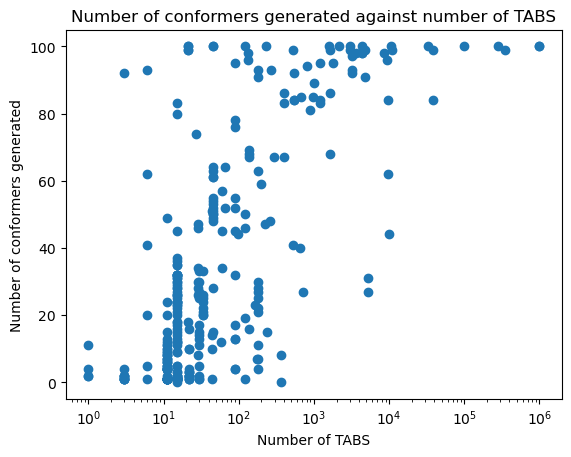

In [5]:
print('Kendall tau', round(kendalltau(combined['nTABS'], combined['confs_generated']).statistic, 3))
# print('Pearson', pearsonr(combined['nTABS'], combined['confs_generated']).statistic)
print('Spearman', round(spearmanr(combined['nTABS'], combined['confs_generated']).correlation, 3))
plt.scatter(combined['nTABS'], combined['confs_generated'])
plt.xlabel('Number of TABS')
plt.ylabel('Number of conformers generated')
plt.title('Number of conformers generated against number of TABS')
#x on log scale
plt.xscale('log')
plt.show()

In [10]:
combined
#write to txt file
combined.to_csv('CarlsSetnTABS_sr_incl_confs_gen.txt', sep=' ', index=False)

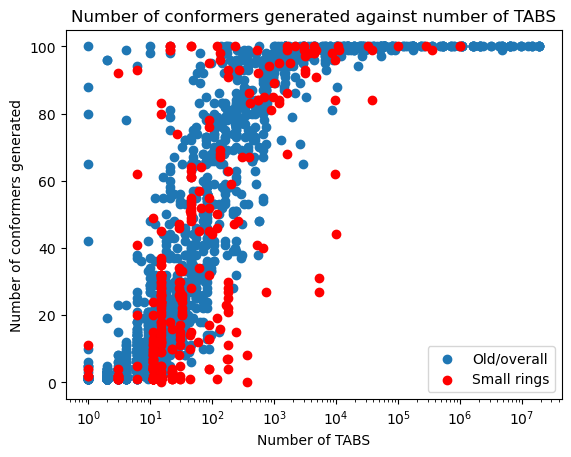

In [6]:
df_tabs_all = pd.read_csv('/localhome/cschiebroek/MDFPs/mdfptools/carl/data_curation/nTABS.txt', sep=' ', header=None)
df_tabs_all.columns = ['smiles', 'nTABS']
combined_old = pd.merge(df_tabs_all, df_confs, on='smiles')
plt.scatter(combined_old['nTABS'], combined_old['confs_generated'])
plt.scatter(combined['nTABS'], combined['confs_generated'], color='red')
plt.xlabel('Number of TABS')
plt.ylabel('Number of conformers generated')
plt.title('Number of conformers generated against number of TABS')
plt.xscale('log')
plt.legend(['Old/overall', 'Small rings'])
plt.show()




In [7]:
import pandas as pd
import plotly.express as px

# Create scatter plot
fig = px.scatter(combined, x='nTABS', y='confs_generated', hover_data=['smiles', 'nTABS', 'confs_generated'])

# Customize the layout
fig.update_layout(
    title='Number of conformers generated against number of TABS',
    xaxis=dict(title='Number of TABS', type='log'),
    yaxis=dict(title='Number of conformers generated'),
    legend=dict(title='Data')
)

# Show the plot
fig.show()


In [8]:
PandasTools.AddMoleculeColumnToFrame(combined, smilesCol='smiles', molCol='mol')
combined_15 = combined[combined['nTABS'] == 15]
mols = combined_15['mol'].tolist()
nconfs = combined_15['confs_generated'].tolist()
ntabs = combined_15['nTABS'].tolist()
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=['nConfs: ' + str(nconfs[i]) + ' nTABS: ' + str(ntabs[i]) for i in range(len(mols))])

NameError: name 'PandasTools' is not defined

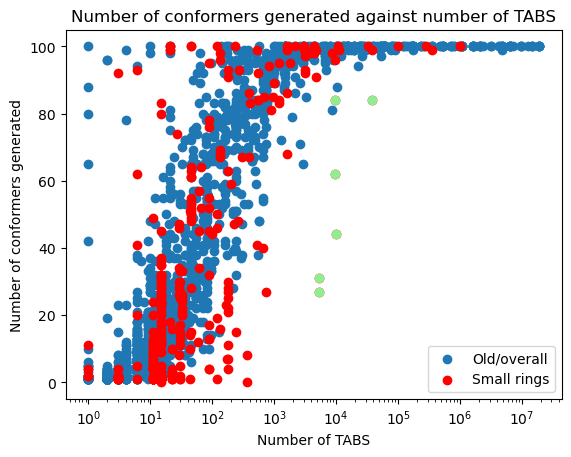

In [ ]:
outliers1 = combined[(combined['nTABS'] > 2000) & (combined['confs_generated'] < 90)]
plt.scatter(combined_old['nTABS'], combined_old['confs_generated'])
plt.scatter(combined['nTABS'], combined['confs_generated'], color='red')
plt.scatter(outliers1['nTABS'], outliers1['confs_generated'], color='lightgreen')
plt.xlabel('Number of TABS')
plt.ylabel('Number of conformers generated')
plt.title('Number of conformers generated against number of TABS')
plt.xscale('log')
plt.legend(['Old/overall', 'Small rings'])
plt.show()


/localhome/cschiebroek/.conda/envs/mtl/lib/python3.11/site-packages/rdkit/Chem/PandasTools.py:371: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



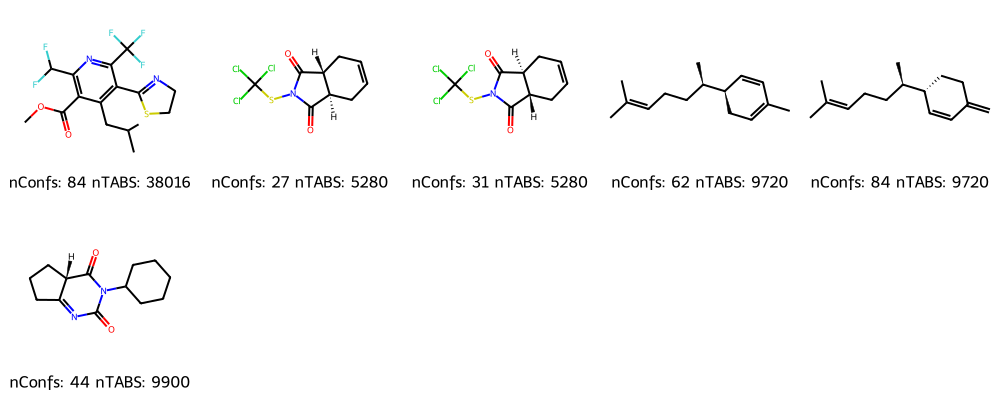

In [ ]:
PandasTools.AddMoleculeColumnToFrame(outliers1, smilesCol='smiles', molCol='mol')
mols = outliers1['mol'].tolist()
nconfs = outliers1['confs_generated'].tolist()
ntabs = outliers1['nTABS'].tolist()
from rdkit.Chem import Draw
Draw.MolsToGridImage(mols, molsPerRow=5, subImgSize=(200, 200), legends=['nConfs: ' + str(nconfs[i]) + ' nTABS: ' + str(ntabs[i]) for i in range(len(mols))])

In [ ]:
combined_old[combined_old['nTABS'] == 11]

,smiles,nTABS,confs_generated


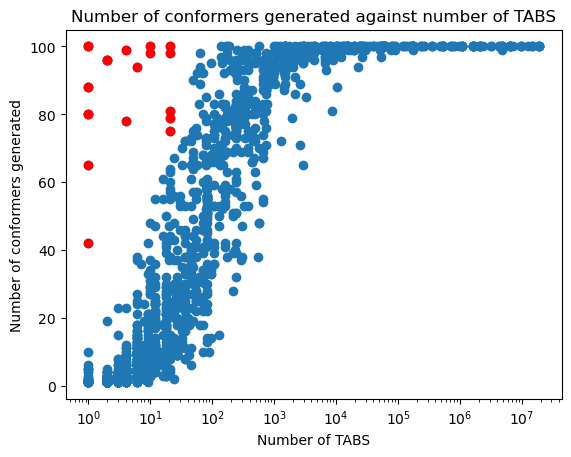

In [ ]:
#get outliers: <100 nTABS but > 40 confs
outliers1 = combined[(combined['nTABS'] < 30) & (combined['confs_generated'] > 70)]
outliers2 = combined[(combined['nTABS'] < 2) & (combined['confs_generated'] > 10)]
#combine these
outliers = pd.concat([outliers1, outliers2])
#color these points red
plt.scatter(combined['nTABS'], combined['confs_generated'])
plt.scatter(outliers['nTABS'], outliers['confs_generated'], color='red')
plt.xlabel('Number of TABS')
plt.ylabel('Number of conformers generated')
plt.title('Number of conformers generated against number of TABS')
#x on log scale
plt.xscale('log')
plt.show()


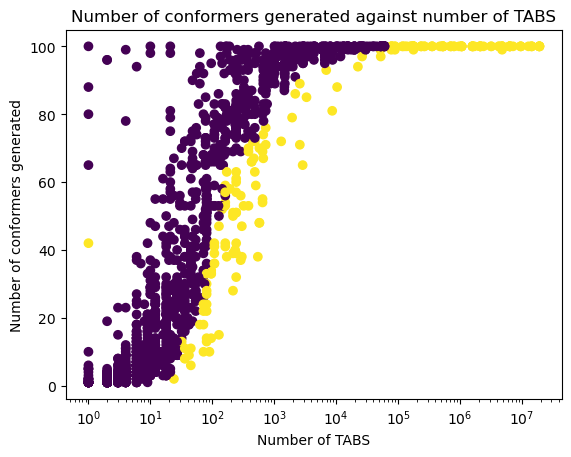

In [ ]:
#get the outliers
#normalize both
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = combined[['nTABS', 'confs_generated']]
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=['nTABS', 'confs_generated'])
X
#find the outliers
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state=0)
clf.fit(X)
outliers = clf.predict(X)
outliers = [1 if i == -1 else 0 for i in outliers]
combined['outlier'] = outliers
combined['outlier'].value_counts()   
#plot the outliers
plt.scatter(combined['nTABS'], combined['confs_generated'], c=combined['outlier'])
plt.xlabel('Number of TABS')
plt.ylabel('Number of conformers generated')
plt.title('Number of conformers generated against number of TABS')
#x on log scale
plt.xscale('log')
plt.show()


/localhome/cschiebroek/.conda/envs/mtl/lib/python3.11/site-packages/rdkit/Chem/PandasTools.py:371: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/localhome/cschiebroek/.conda/envs/mtl/lib/python3.11/site-packages/rdkit/Chem/Draw/IPythonConsole.py:261: UserWarning:

Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.



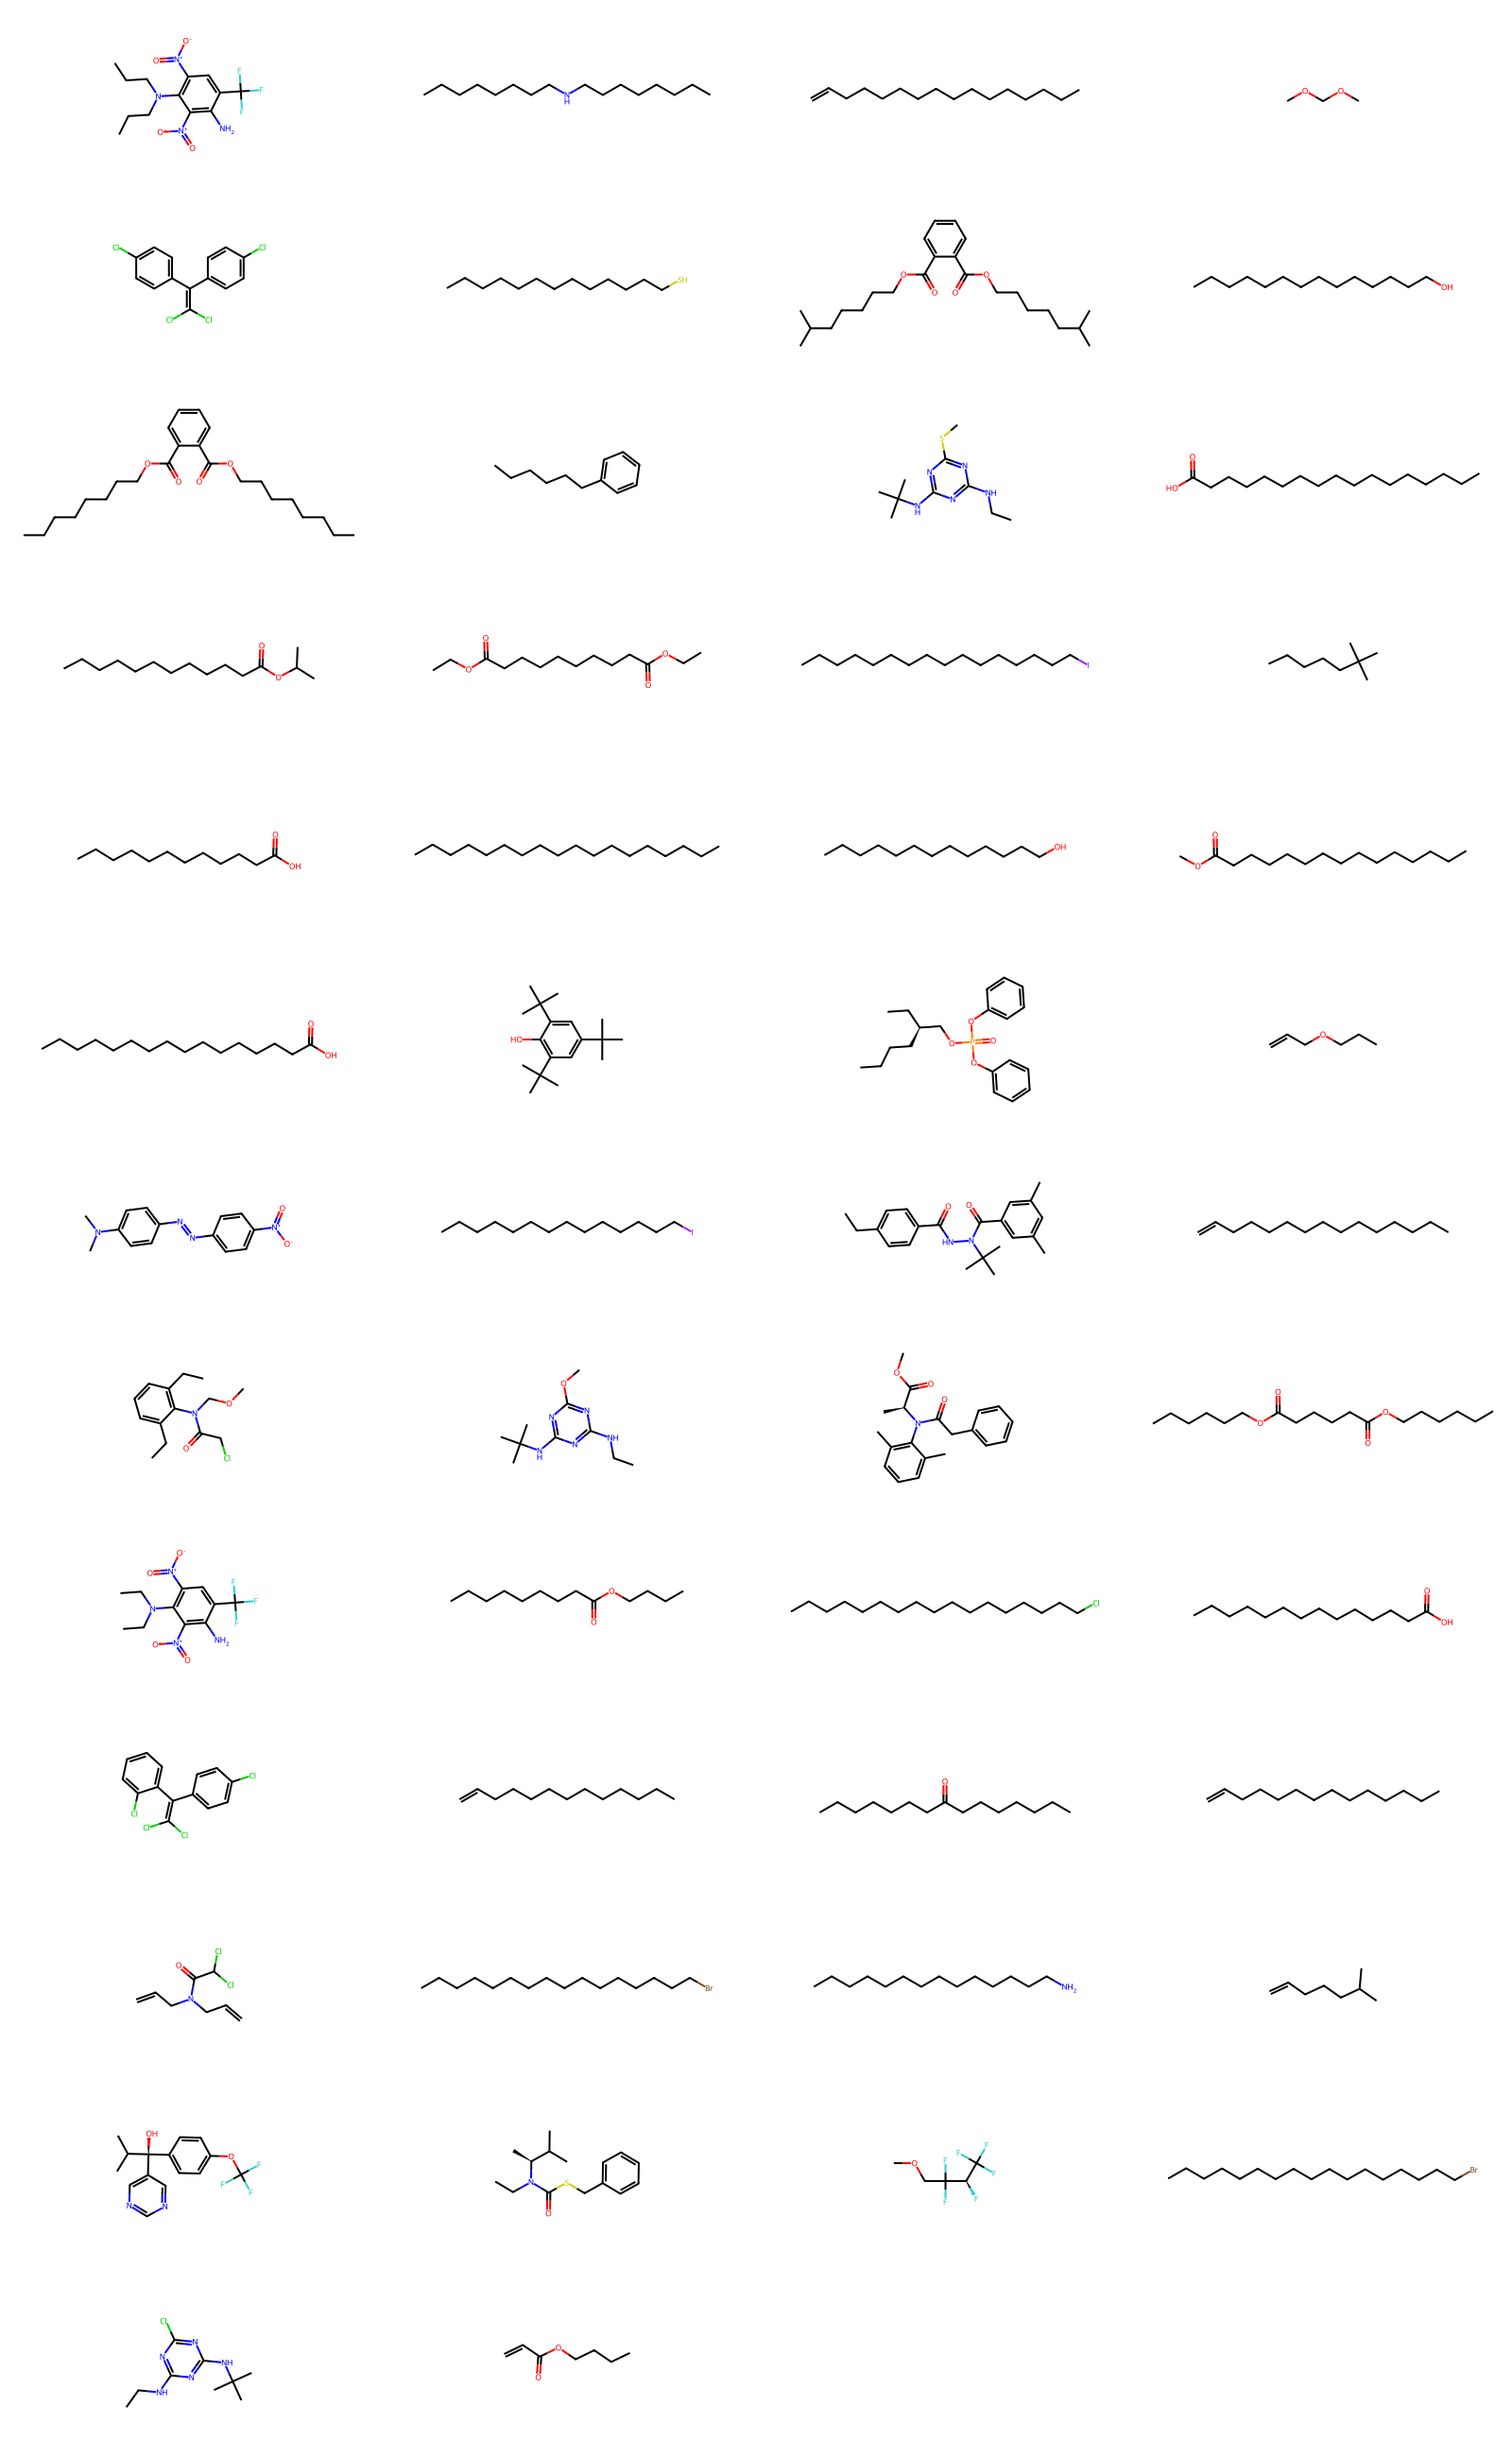

In [ ]:
#plot outliers
from rdkit.Chem import PandasTools
outliers_df = combined[combined['outlier'] == 1]
PandasTools.AddMoleculeColumnToFrame(outliers_df, smilesCol='smiles', molCol='mol')
PandasTools.FrameToGridImage(outliers_df, column='mol', legendsCol=None, molsPerRow=4, subImgSize=(400, 200))